<a href="https://colab.research.google.com/github/tharasri58/PersonalFundApprovelPrediction/blob/PersonalFundApprovalPrediction/personalFundApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/content/loan_approval_dataset.csv")

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
data.sum().isnull()

loan_id                      False
 no_of_dependents            False
 education                   False
 self_employed               False
 income_annum                False
 loan_amount                 False
 loan_term                   False
 cibil_score                 False
 residential_assets_value    False
 commercial_assets_value     False
 luxury_assets_value         False
 bank_asset_value            False
 loan_status                 False
dtype: bool

In [6]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [7]:
print(data.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [8]:
data['ed_enc'] = encoder.fit_transform(data[[' education']])

In [9]:
data['selfEmp_enc'] = encoder.fit_transform(data[[' self_employed']])
data['en_loanStatus'] = encoder.fit_transform(data[[' loan_status']])

In [10]:
data.drop(columns=' education',axis=1,inplace=True)

In [11]:
data.drop(columns=' self_employed',axis=1,inplace=True)
data.drop(columns=' loan_status',axis=1,inplace=True)

<Axes: >

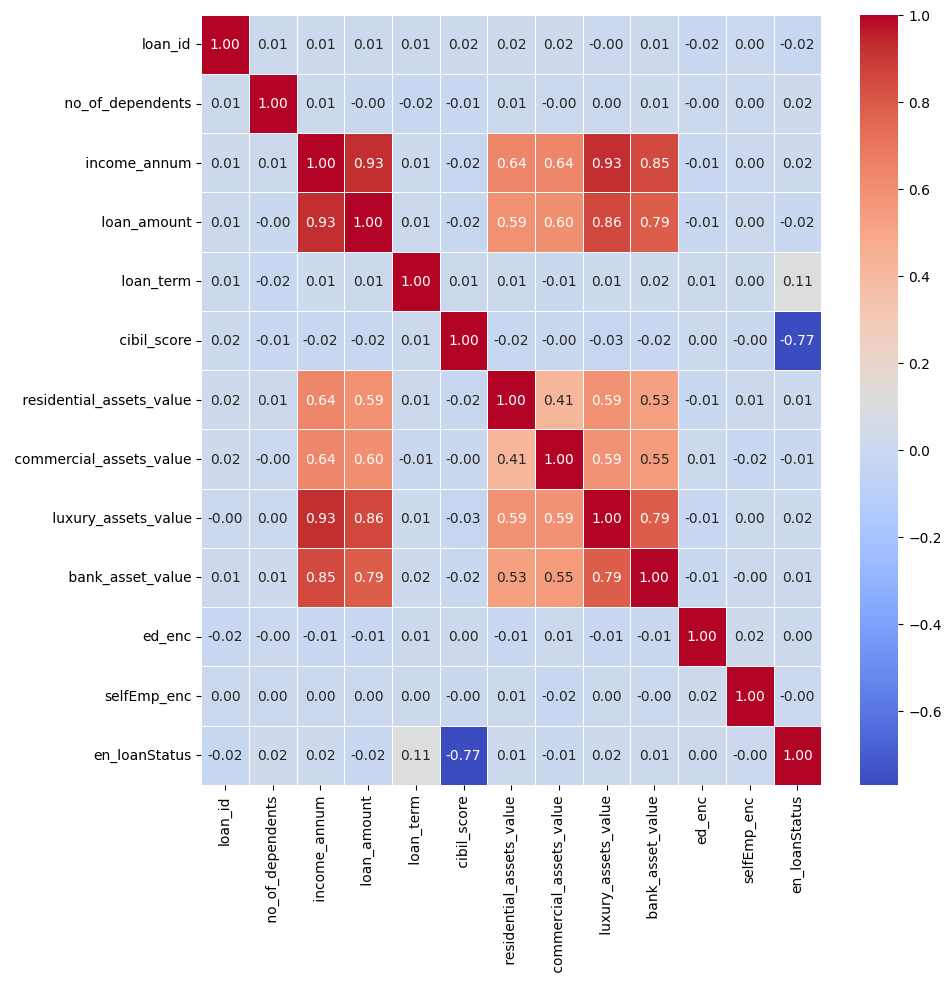

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)

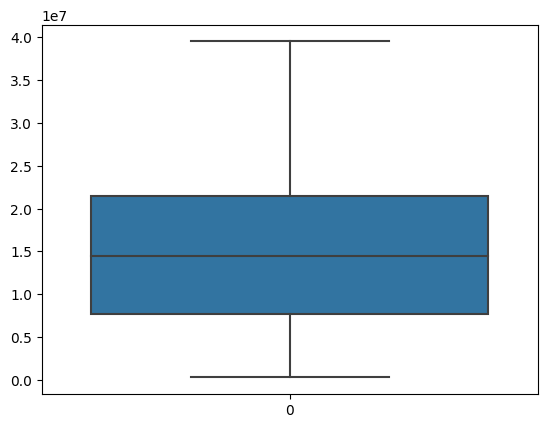

In [13]:
sns.boxplot(data[' loan_amount'])
plt.show()

In [16]:
data.drop(columns='loan_id',axis=1,inplace=True)

In [14]:
data.drop([' income_annum',' loan_amount'],axis=1,inplace=True)

<Axes: >

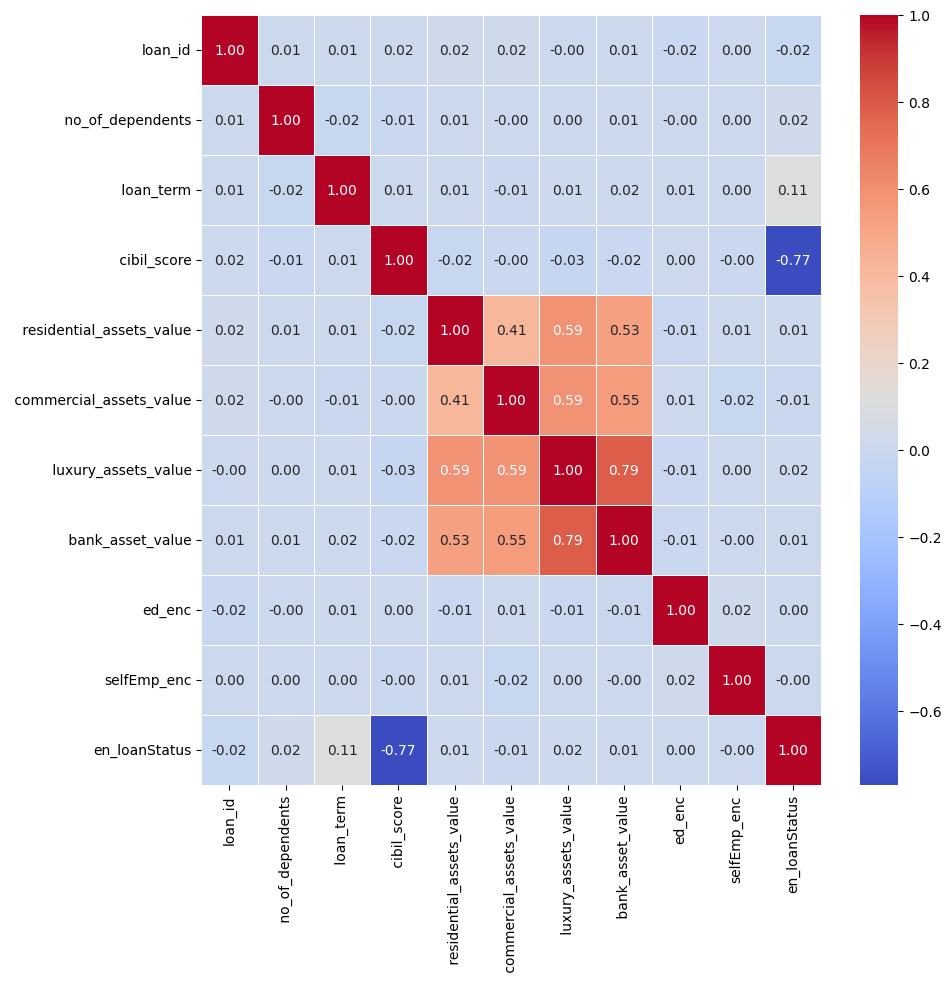

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)

<Axes: xlabel=' cibil_score', ylabel=' loan_term'>

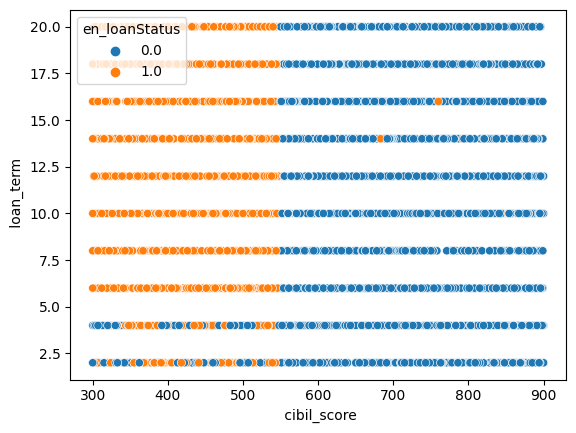

In [17]:
sns.scatterplot(data=data,x=' cibil_score',y=' loan_term',hue='en_loanStatus')

In [18]:
!pip install xgboost

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
y=data['en_loanStatus']

In [21]:
X=data

In [22]:
y

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4264    1.0
4265    0.0
4266    1.0
4267    0.0
4268    0.0
Name: en_loanStatus, Length: 4269, dtype: float64

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [24]:
from sklearn.linear_model import  LogisticRegression
logReg = LogisticRegression()

In [25]:
logReg.fit(X_train,y_train)

LogisticRegression()

In [26]:
pred1 = logReg.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(pred1,y_test)

0.7125468164794008

In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [29]:
nb.fit(X_train,y_train)
pred2 = nb.predict(X_test)

In [30]:
accuracy_score(pred2,y_test)

0.7677902621722846

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [32]:
dt.fit(X_train,y_train)
pred3 = dt.predict(X_test)

In [33]:
accuracy_score(pred3,y_test)

1.0

In [34]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(x) for x in dt.classes_],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves the tree as a PDF file


'decision_tree.pdf'

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42)

In [36]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [37]:
pred5 = rfc.predict(X_test)


In [38]:
accuracy_score(pred5,y_test)

1.0

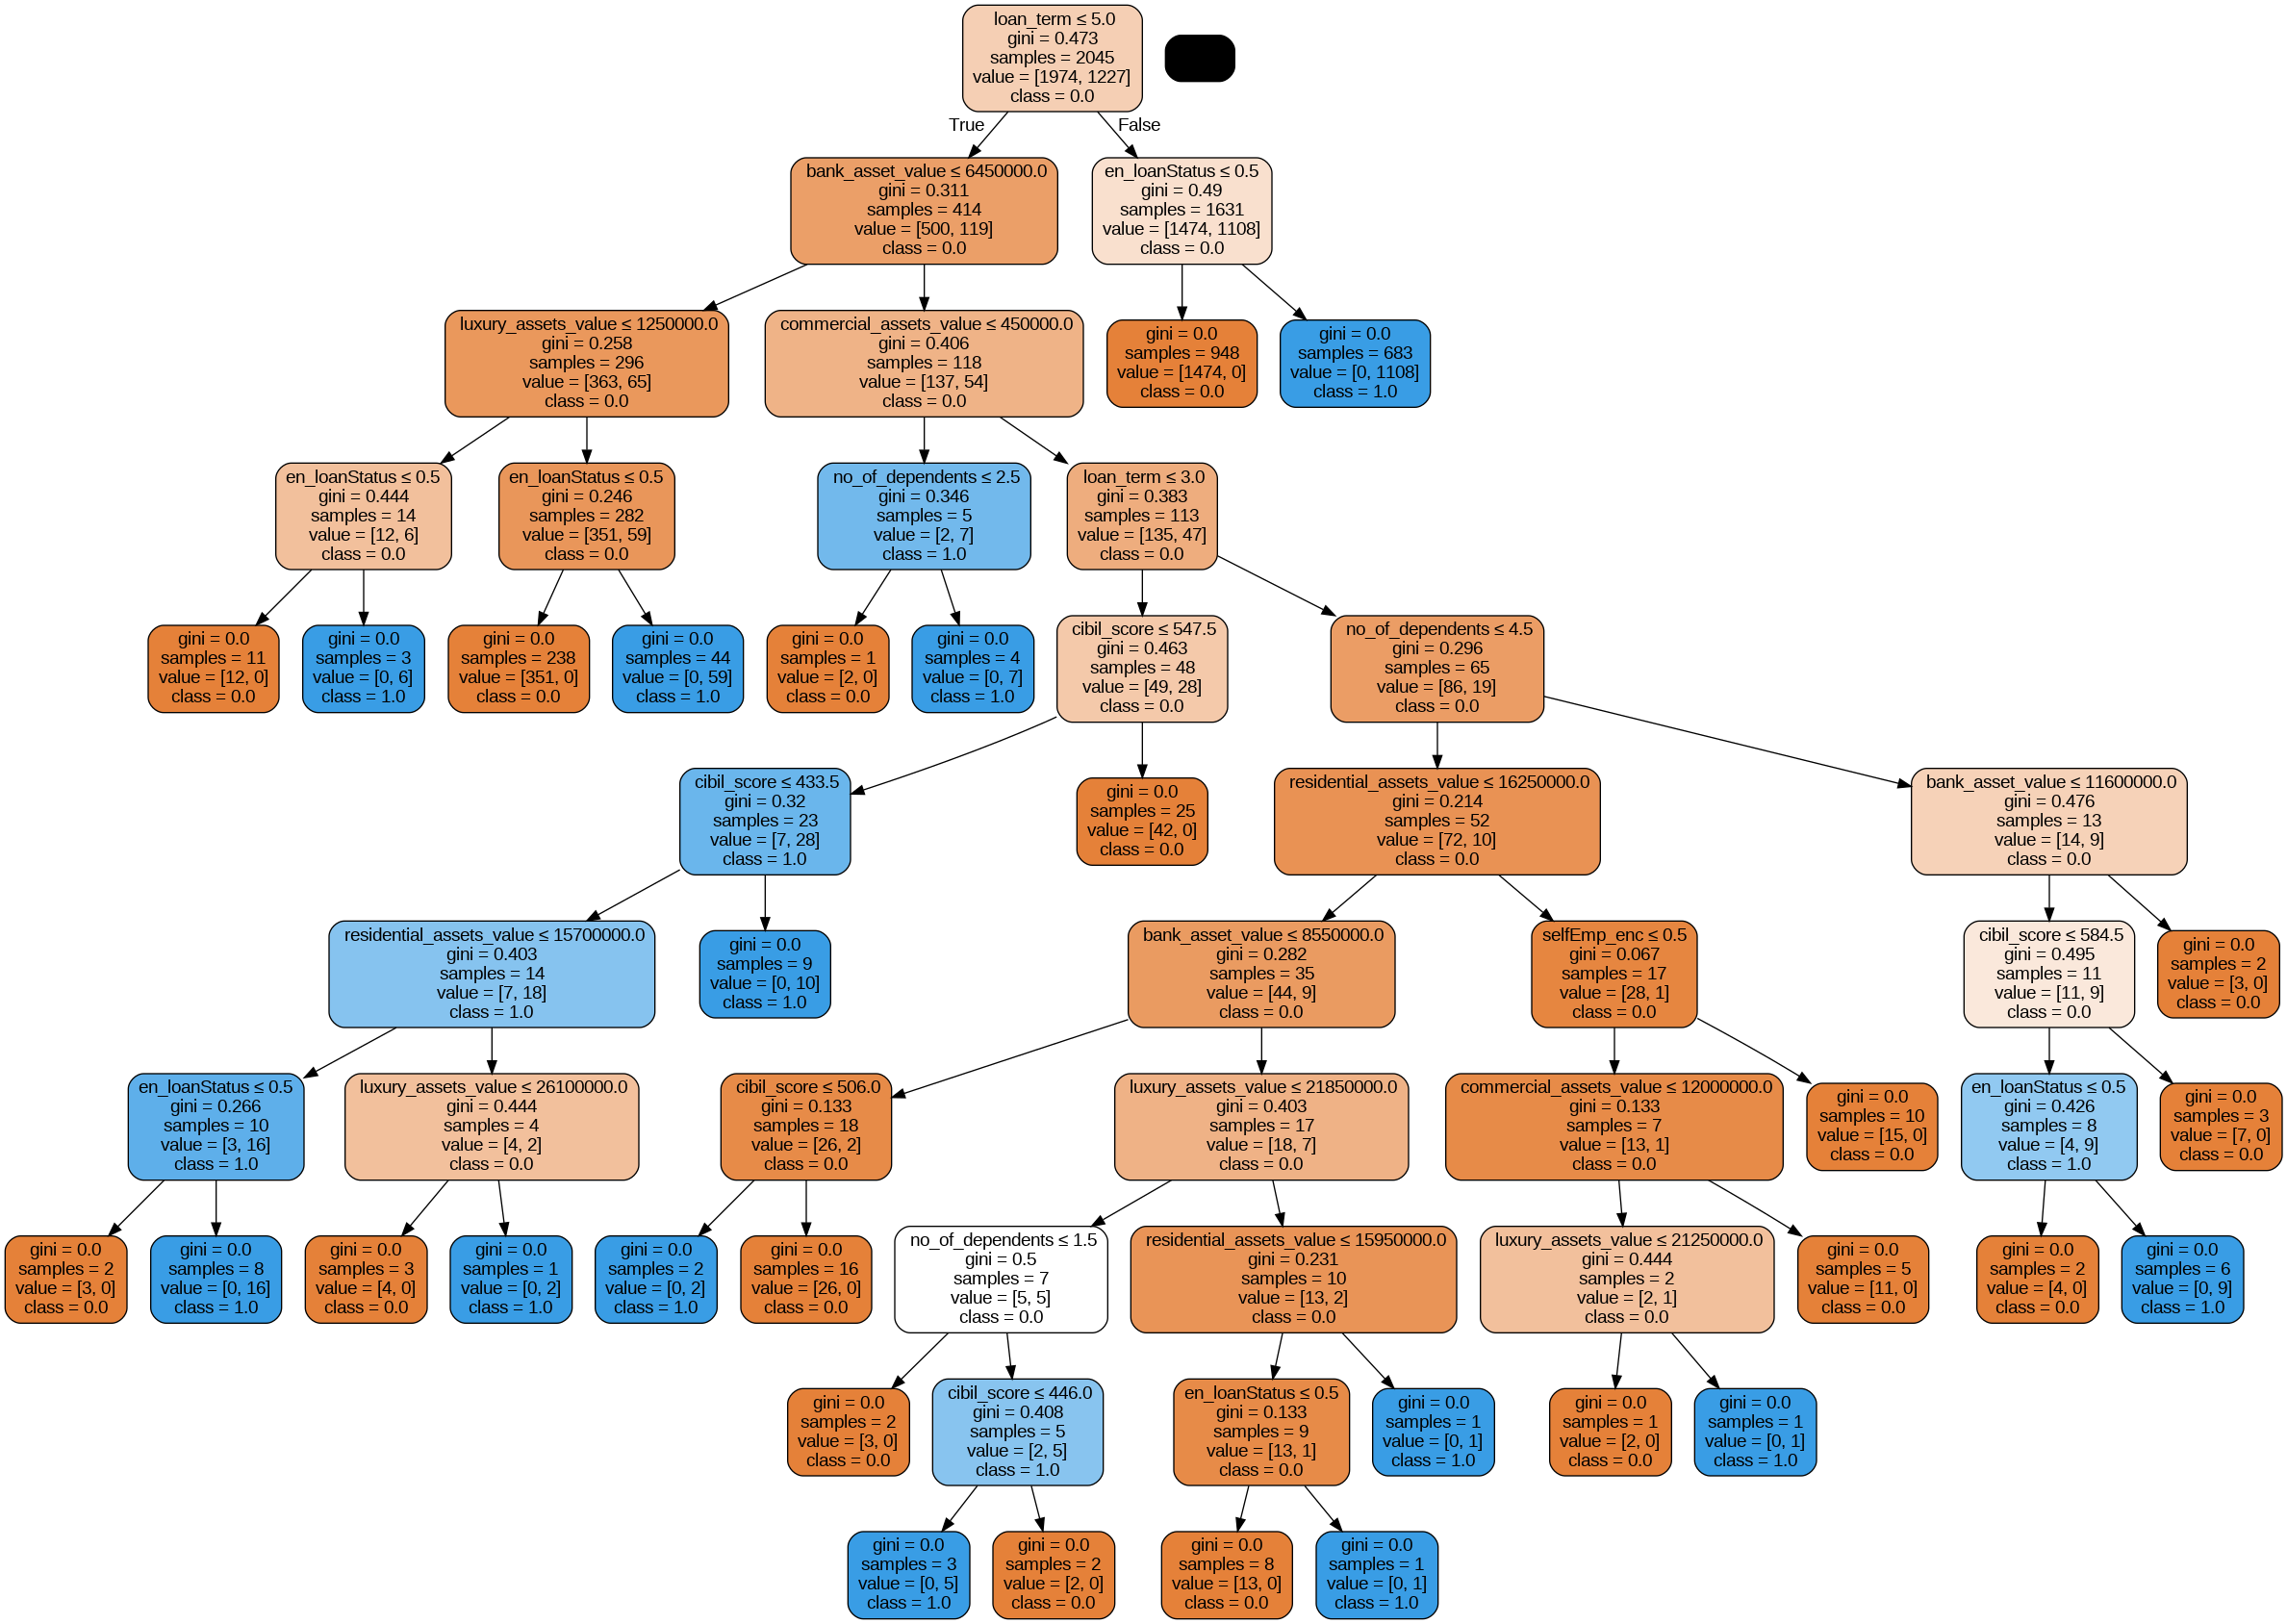

In [39]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
tree = rfc.estimators_[0]
dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(x) for x in rfc.classes_],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("Rdecision_tree.png")
Image("Rdecision_tree.png")


In [40]:
import xgboost as xgb


In [41]:
xb = xgb.XGBClassifier()

In [42]:
xb.fit(X_train,y_train)
pred6=xb.predict(X_test)

In [43]:
accuracy_score(pred6,y_test)

1.0